<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

# Todo Experiment #5

## 1) Repeat the above procedure by generating two moons of data. Compare the performance of the clustering algorithms, qualitatively and quantitatively, when applied to the blobs dataset and two moons datasets. Use the below code to generate the two moons dataset. You need to set K = 2 for KMeans and ε = 0.15, min samples = 5 for the DBSCAN algorithm.

### Generating Data

In [352]:
# Generate a non Gaussian 2D dataset (two moons)
from sklearn.datasets import make_moons
X, labels_true = make_moons(n_samples=500, noise=0.1)

### Data visualization

Text(0.5, 1.0, 'Blobs with lables')

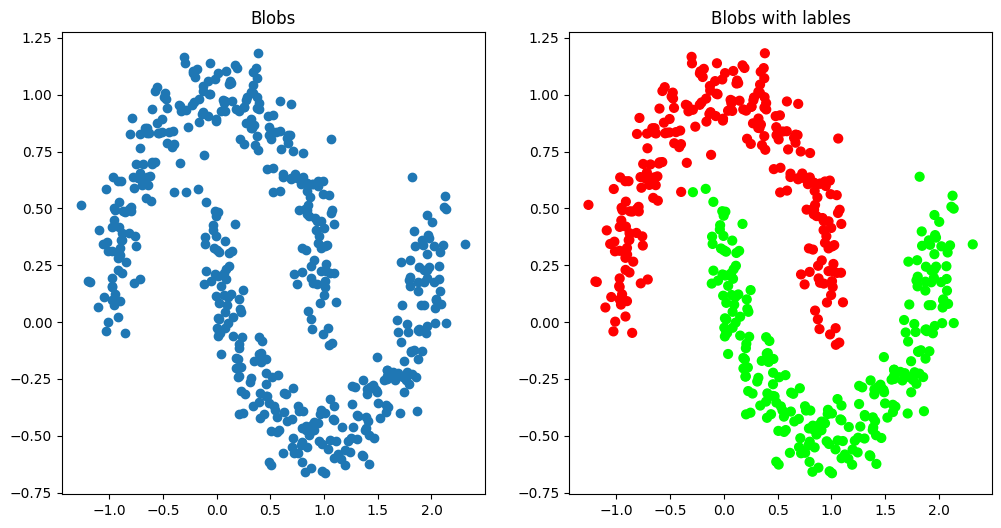

In [353]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

### KMeans

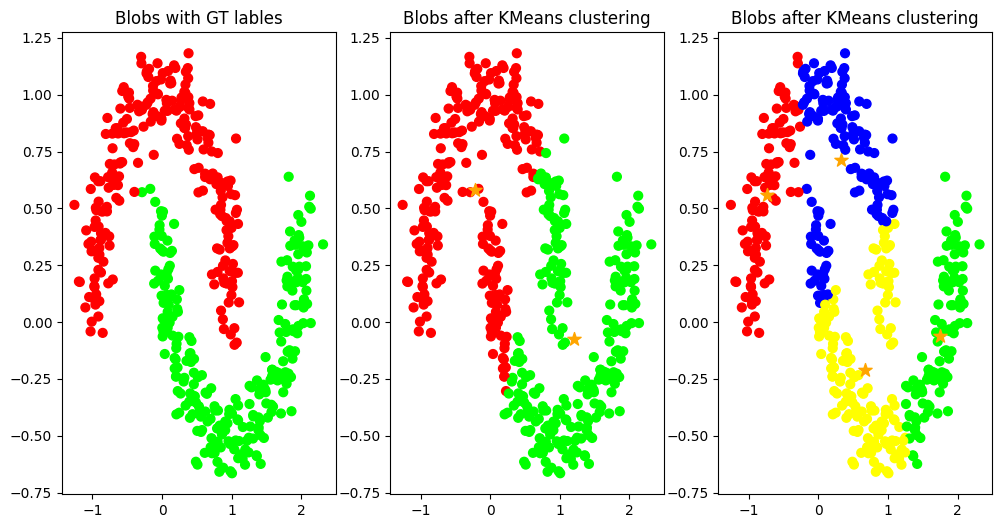

In [354]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

fig,axs=plt.subplots(1,3,figsize=(12,6))
colormap=np.array(['red','lime','blue','yellow'])

predYs = []

# Plot the blobs before the clustering

axs[0].scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
axs[0].set_title('Blobs with GT lables')

K = [2, 4]
for idx,k in enumerate(K):
    model=KMeans(n_clusters=k)
    model.fit(X)
    predY=np.choose(model.labels_,range(0,k)).astype(np.int64)
    predYs.append(predY)

    # Plot the blobs after KMeans clustering

    axs[idx+1].scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
    axs[idx+1].set_title('Blobs after KMeans clustering')

    # We will also get the coordinates of the cluster centers using KMeans .cluster_centers_ and save it as k_means_cluster_centers.
    k_means_cluster_centers = model.cluster_centers_

    # define the centroid, or cluster center.
    cluster_centers = k_means_cluster_centers

    #print(cluster_center)

    axs[idx+1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', c='orange',s=100)



#### Discussion

k means didnot do well in clusturing this dataset 

when k = 2 the data was seperated in a bad way same for k = 4

### DBSCAN

#### eps=0.15, min_samples=5

In [355]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for blobs data



labels_1 = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_ = list(labels_1).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 7


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 2')

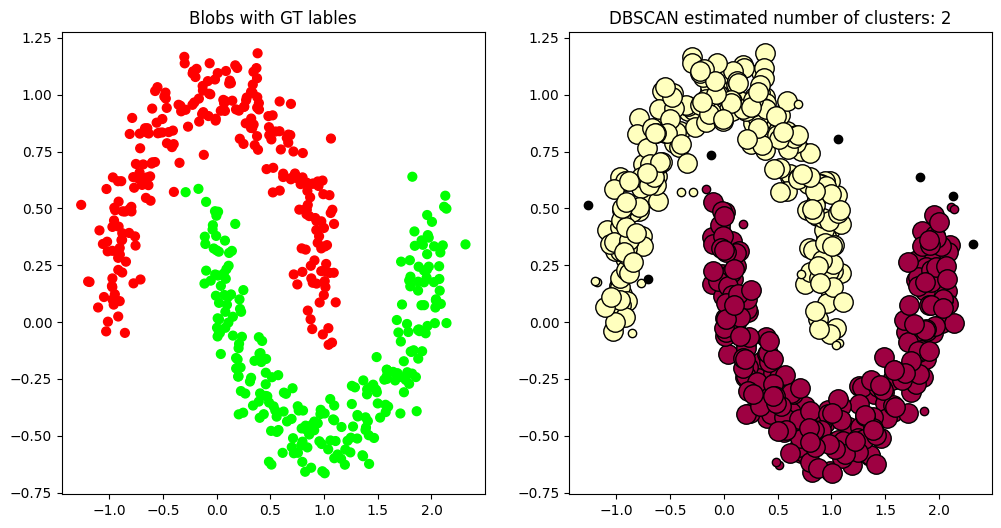

In [356]:
plt.figure(figsize=(12,6))

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size

plt.subplot(1,2,2)
unique_labels = set(labels_1)
core_samples_mask = np.zeros_like(labels_1, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels_1 == k
    xy = X[class_member_mask & core_samples_mask]

    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )
    
    xy = X[class_member_mask & ~core_samples_mask]
    
    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

#### eps=0.25, min_samples=25

In [357]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.25, min_samples=25).fit(X) # Params for blobs data

labels2 = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise_ = list(labels2).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 2')

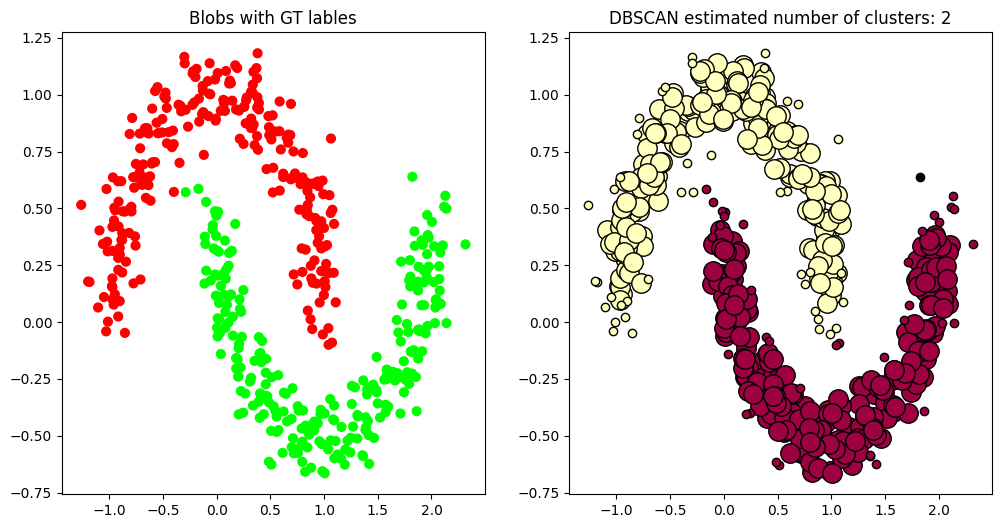

In [358]:
plt.figure(figsize=(12,6))

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size

plt.subplot(1,2,2)
unique_labels = set(labels2)
core_samples_mask = np.zeros_like(labels2, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels2 == k
    xy = X[class_member_mask & core_samples_mask]

    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )
    
    xy = X[class_member_mask & ~core_samples_mask]
    
    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")


#### Discussion

from visualization it is noticed that both parameters have good clusturing but with eps=0.25, min_samples=25 all data were assigned to a cluster with no noise data

### Compute Gaussian Mixture Model (GMM)

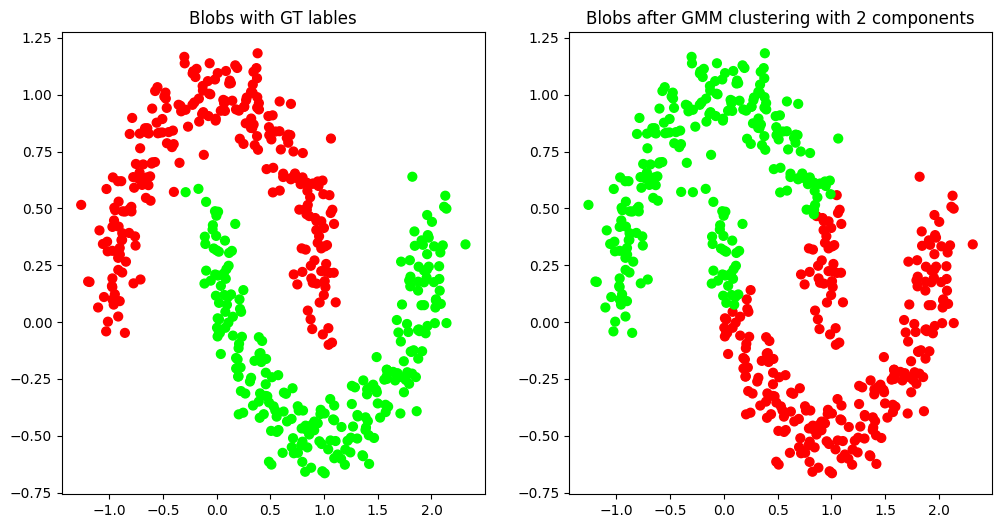

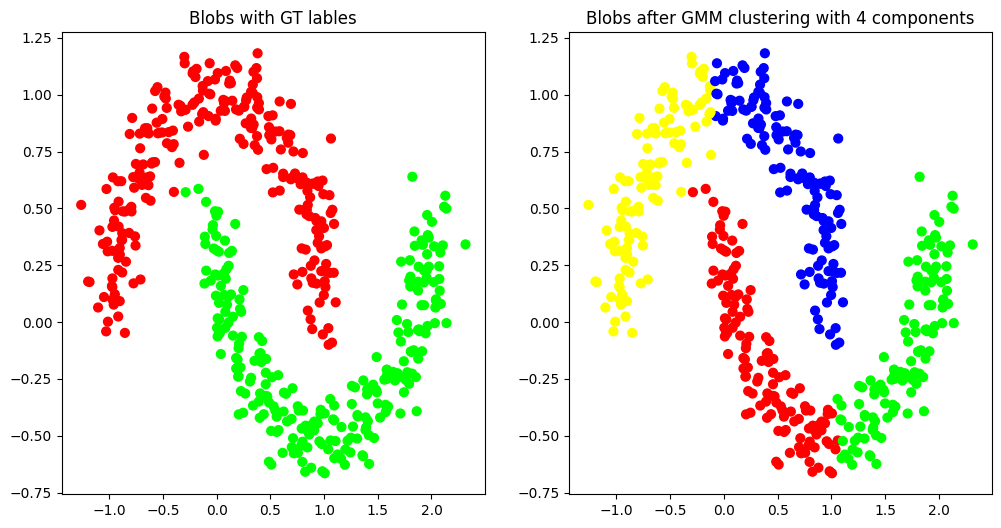

In [359]:
from sklearn.mixture import GaussianMixture

components = [2, 4]
y_cluster_gmm_all = []
for c in components:
    gmm=GaussianMixture(n_components=c)
    gmm.fit(X)
    y_cluster_gmm=gmm.predict(X)
    y_cluster_gmm_all.append(y_cluster_gmm)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
    plt.title('Blobs with GT lables')
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
    plt.title(f'Blobs after GMM clustering with {c} components')


#### Discussion

GMM didnot do well in clusturing this dataset 

when n_components = 2 the data was seperated in a bad way same for n_components = 4

### Quantitative results comparison of the clustering methods using evaluation measures

In [360]:
results = {"method": [],'Parameters':[] , "Homogeneity": [], "Completeness": [], "V-measure": [], "Adjusted Rand Index": [], "Adjusted Mutual Information": [], "Silhouette Coefficient": []}

# DBSCAN
# first set of parameters
results["Homogeneity"].append(metrics.homogeneity_score(labels_true, labels_1))
results["Completeness"].append(metrics.completeness_score(labels_true, labels_1))
results["V-measure"].append(metrics.v_measure_score(labels_true, labels_1))
results["Adjusted Rand Index"].append(metrics.adjusted_rand_score(labels_true, labels_1))
results["Adjusted Mutual Information"].append(metrics.adjusted_mutual_info_score(labels_true, labels_1))
results["Silhouette Coefficient"].append(metrics.silhouette_score(X, labels_1))
results['Parameters'].append(f"eps=0.15, min_samples=5")
results["method"].append("DBSCAN")

# second set of parameters
results["Homogeneity"].append(metrics.homogeneity_score(labels_true, labels2))
results["Completeness"].append(metrics.completeness_score(labels_true, labels2))
results["V-measure"].append(metrics.v_measure_score(labels_true, labels2))
results["Adjusted Rand Index"].append(metrics.adjusted_rand_score(labels_true, labels2))
results["Adjusted Mutual Information"].append(metrics.adjusted_mutual_info_score(labels_true, labels2))
results["Silhouette Coefficient"].append(metrics.silhouette_score(X, labels2))
results['Parameters'].append(f"eps=0.25, min_samples=25")
results["method"].append("DBSCAN")

# KMeans
for predY in predYs:
    results["Homogeneity"].append(metrics.homogeneity_score(labels_true, predY))
    results["Completeness"].append(metrics.completeness_score(labels_true, predY))
    results["V-measure"].append(metrics.v_measure_score(labels_true, predY))
    results["Adjusted Rand Index"].append(metrics.adjusted_rand_score(labels_true, predY))
    results["Adjusted Mutual Information"].append(metrics.adjusted_mutual_info_score(labels_true, predY))
    results["Silhouette Coefficient"].append(metrics.silhouette_score(X, predY))
    results['Parameters'].append(f"n_clusters={len(set(predY))}")
    results["method"].append("KMeans")

# GMMs
for y_cluster_gmm in y_cluster_gmm_all:
    results["Homogeneity"].append(metrics.homogeneity_score(labels_true, y_cluster_gmm))
    results["Completeness"].append(metrics.completeness_score(labels_true, y_cluster_gmm))
    results["V-measure"].append(metrics.v_measure_score(labels_true, y_cluster_gmm))
    results["Adjusted Rand Index"].append(metrics.adjusted_rand_score(labels_true, y_cluster_gmm))
    results["Adjusted Mutual Information"].append(metrics.adjusted_mutual_info_score(labels_true, y_cluster_gmm))
    results["Silhouette Coefficient"].append(metrics.silhouette_score(X, y_cluster_gmm))
    results['Parameters'].append(f"n_components={len(set(y_cluster_gmm))}")
    results["method"].append("GMM")



In [361]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df


results_df['method_with_param']=results_df['method']+" "+results_df['Parameters']


results_df


method                Parameters  Homogeneity  Completeness  V-measure  \
0  DBSCAN   eps=0.15, min_samples=5     0.967431      0.885706   0.924766   
1  DBSCAN  eps=0.25, min_samples=25     0.947590      0.930093   0.938760   
2  KMeans              n_clusters=2     0.191970      0.192006   0.191988   
3  KMeans              n_clusters=4     0.531618      0.268303   0.356622   
4     GMM            n_components=2     0.385873      0.386159   0.386016   
5     GMM            n_components=4     1.000000      0.500613   0.667211   

   Adjusted Rand Index  Adjusted Mutual Information  Silhouette Coefficient  \
0             0.964262                     0.924547                0.270323   
1             0.972152                     0.938550                0.165254   
2             0.252518                     0.190817                0.490278   
3             0.268347                     0.354739                0.445154   
4             0.483382                     0.385126                0.457745   
5             0.500195                     0.666243                0.462926   

                 method_with_param  
0   DBSCAN eps=0.15, min_samples=5  
1  DBSCAN eps=0.25, min_samples=25  
2              KMeans n_clusters=2  
3              KMeans n_clusters=4  
4               GMM n_components=2  
5               GMM n_components=4

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_51180\1763413412.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_51180\1763413412.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_51180\1763413412.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_51180\1763413412.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), r

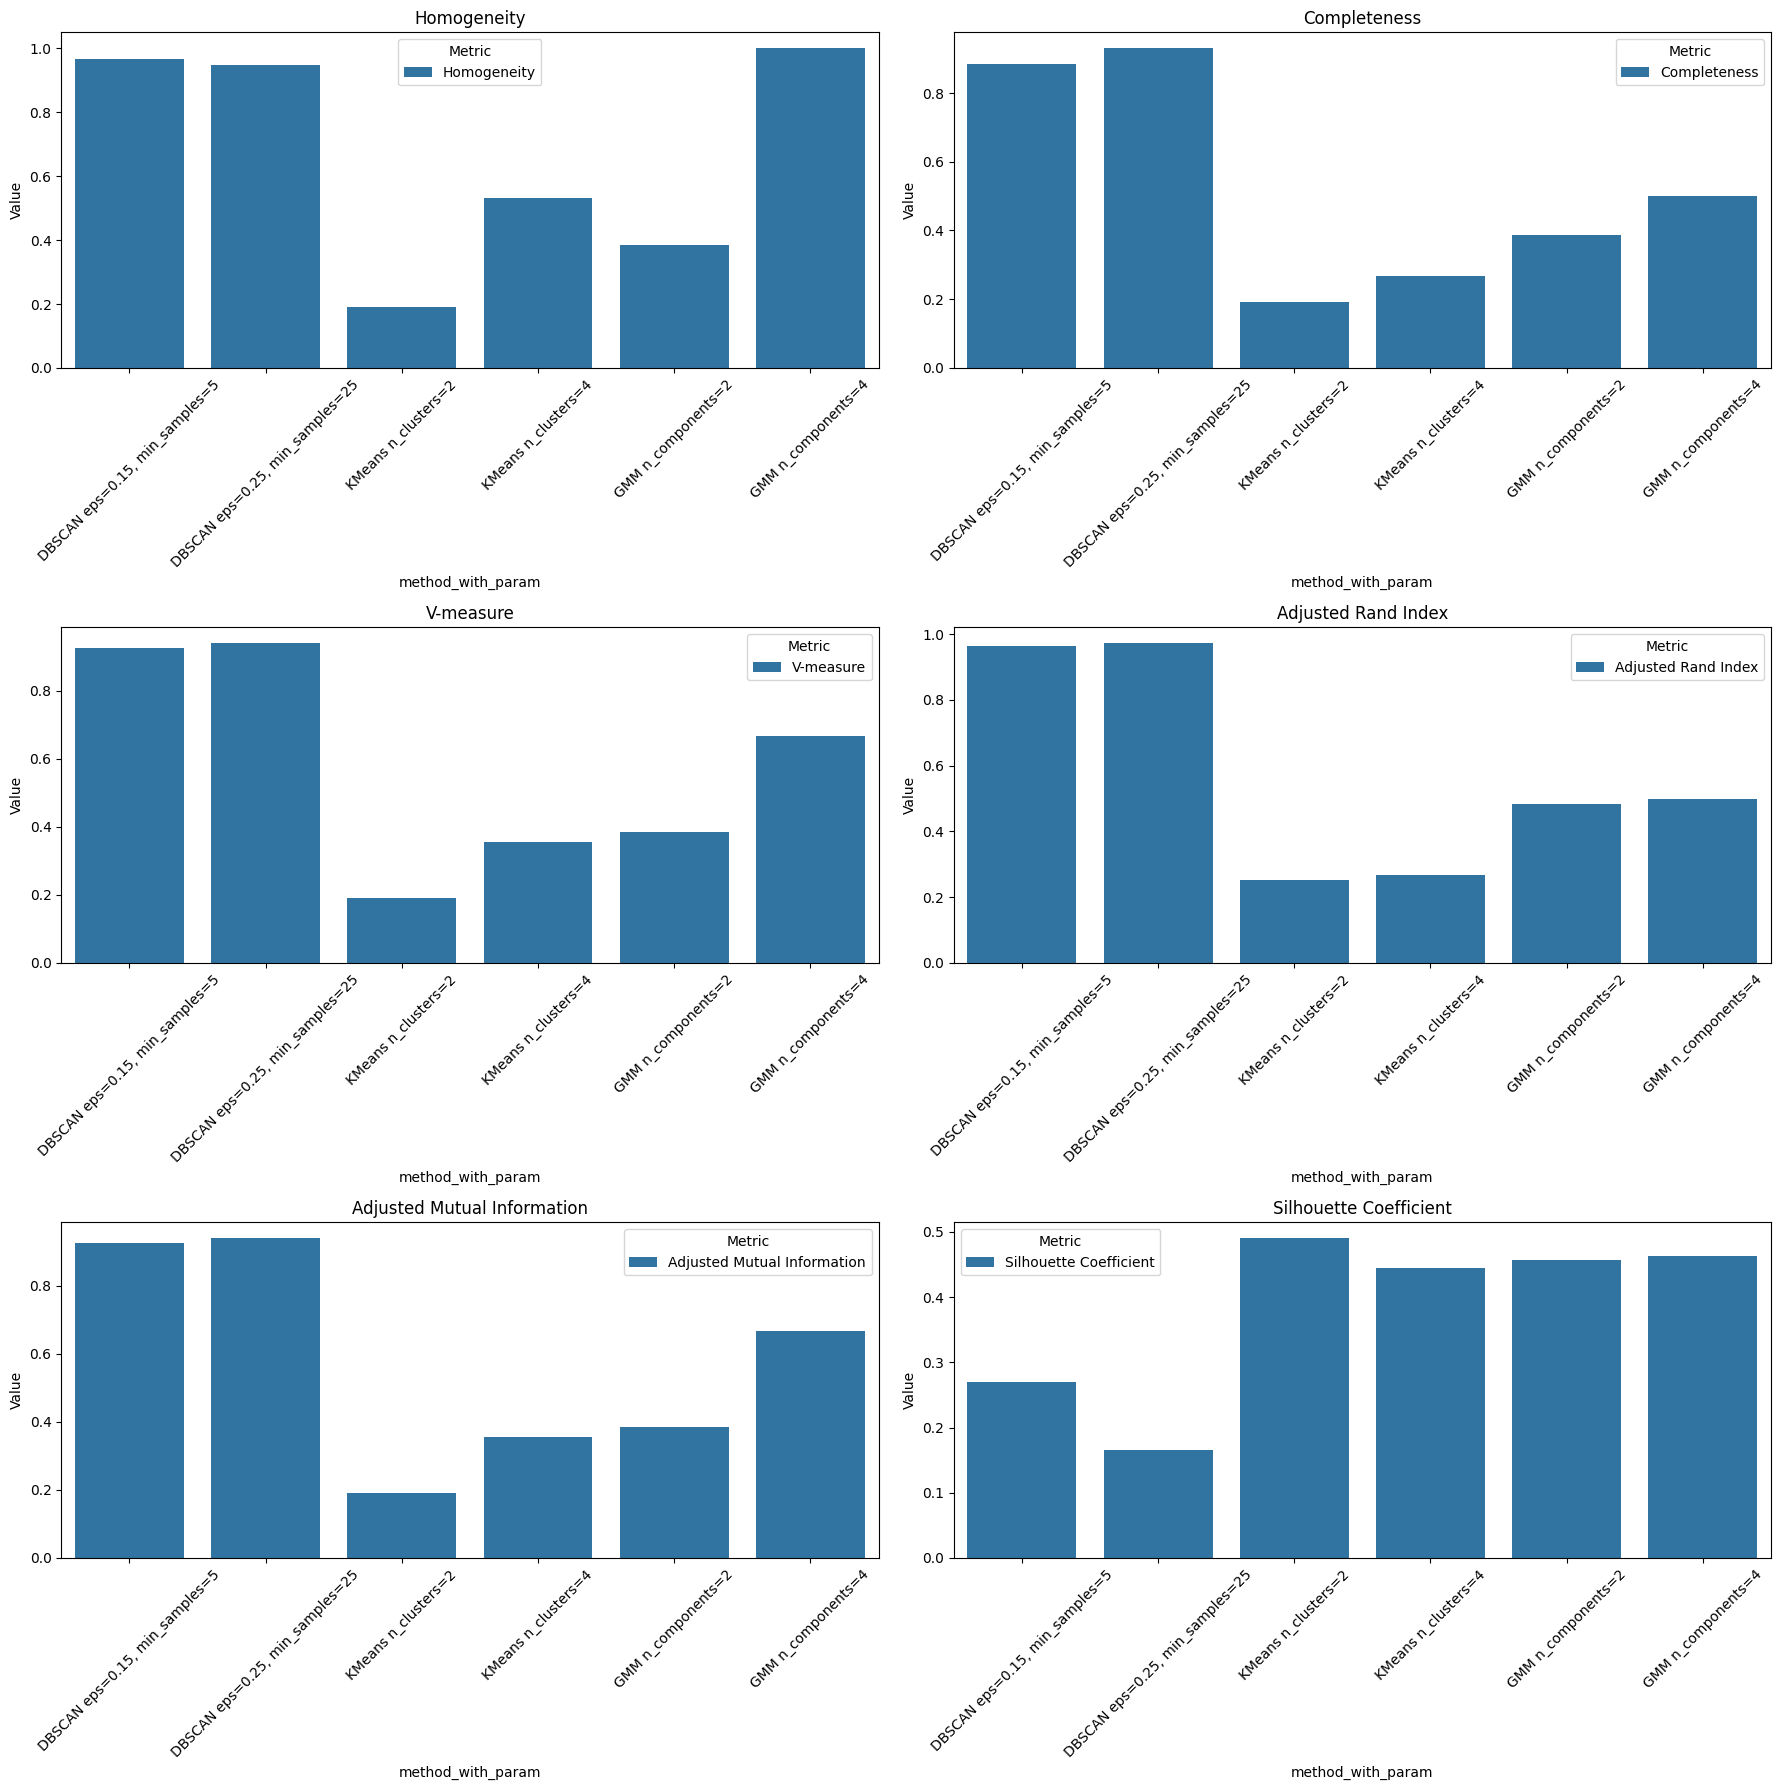

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming results_df is your DataFrame and it has columns for each metric
# Melt the DataFrame to long format
results_long_df = pd.melt(results_df, id_vars=['method_with_param'], 
                          value_vars=['Homogeneity', 'Completeness', 'V-measure', 
                                      'Adjusted Rand Index', 'Adjusted Mutual Information', 
                                      'Silhouette Coefficient'],
                          var_name='Metric', value_name='Value')

# Create a figure with 3 rows and 2 columns of subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# List of metrics to plot
metrics = [
    'Homogeneity', 
    'Completeness', 
    'V-measure', 
    'Adjusted Rand Index', 
    'Adjusted Mutual Information', 
    'Silhouette Coefficient'
]

# Plot each metric in a separate subplot
for ax, metric in zip(axs.flatten(), metrics):
    sns.barplot(x='method_with_param', y='Value', hue='Metric', data=results_long_df[results_long_df['Metric'] == metric], ax=ax)
    ax.set_title(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Metric')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- DBSCAN shows high homogeneity, completeness, and V-measure, indicating that it performs well in clustering with respect to true class labels. ARI and AMI scores are very high, suggesting that the clustering is very consistent with the ground truth. The silhouette coefficient, however, is relatively low, which might indicate some issues with cluster separation or the density of clusters.

- KMeans with n_clusters=2 performs poorly with low scores across all metrics, indicating poor clustering performance. Increasing the number of clusters to 4 improves some metrics, but results are still not as high as those from DBSCAN. The silhouette coefficient is relatively better compared to DBSCAN, suggesting better-defined clusters in terms of separation but still not very high.

- GMM performs better than KMeans but does not reach the level of DBSCAN. The results improve with more components, showing that GMM is capable of capturing the underlying distribution of data better as the number of components increases. The silhouette coefficient is relatively consistent but not as high as in KMeans.


 DBSCAN seems to be the most effective method for this dataset based on the provided metrics, while KMeans struggles to achieve high-quality clustering. GMM provides a balanced approach, improving with more components but still falling short of DBSCAN's performance.

## 2) K-means attempts to minimize the total squared error, while k-medoids minimize the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k -means algorithm, k -medoids choose data points as centers (medoids or exemplars). Compare, qualitatively and quantitatively, the results of k-means and k-medoid when applied to the blobs dataset.

### Data Blob Generation

In [363]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)


Text(0.5, 1.0, 'Blobs with lables')

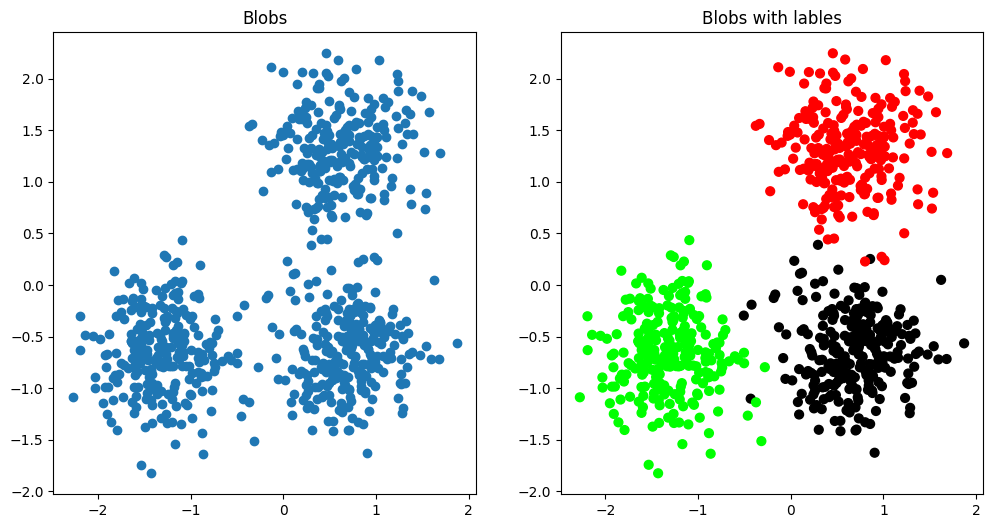

In [364]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

### K-means

In [365]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)


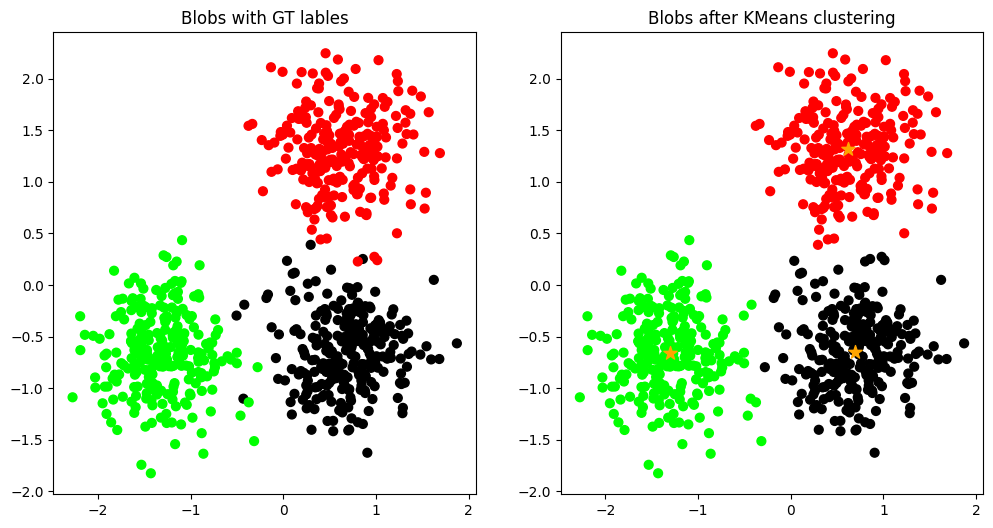

In [366]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')

# We will also get the coordinates of the cluster centers using KMeans .cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_

# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers

#print(cluster_center)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)

### KMedoids

In [367]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=0).fit(X)

kmedoids.labels_

array([2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1,
       0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,

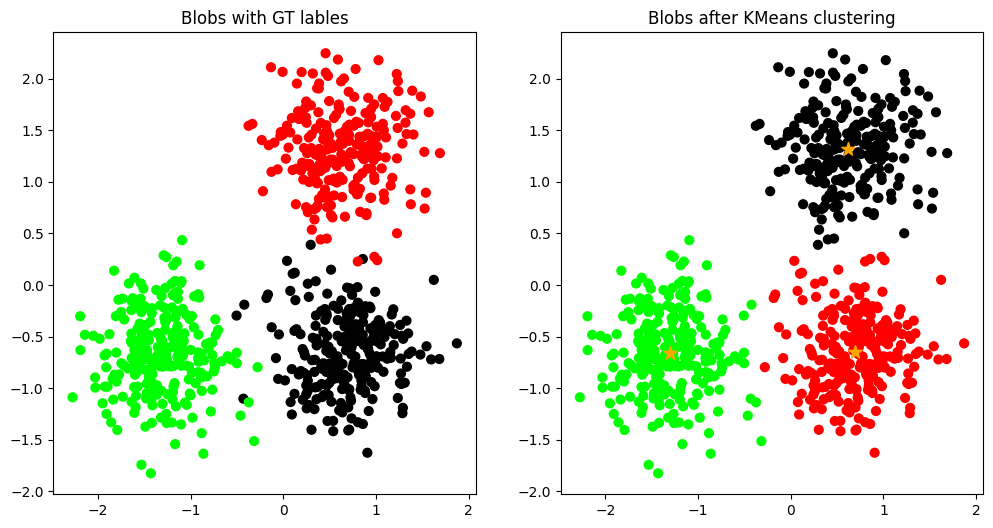

In [368]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[kmedoids.labels_],s=40)
plt.title('Blobs after KMeans clustering')

# We will also get the coordinates of the cluster centers using KMeans .cluster_centers_ and save it as k_means_cluster_centers.
k_Medoids_cluster_centers = model.cluster_centers_

# define the centroid, or cluster center.
cluster_centers = k_Medoids_cluster_centers

#print(cluster_center)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)

### Comaprison

In [369]:
from sklearn import metrics

In [370]:
print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")

print(f"K-Medoids Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, kmedoids.labels_):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,kmedoids.labels_):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, kmedoids.labels_):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,kmedoids.labels_):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, kmedoids.labels_):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, kmedoids.labels_):.3f}")
print(f"\n---------------------------")

K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
K-Medoids Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------


- K-Means uses the mean of points as centroids, which are not necessarily actual data points.
- K-Medoids uses actual data points as medoids.

but in the blob dataset both gave identicall result

## 3) Write a Python program that takes your own color image as input and segmentsthe image into a) K = 2, b) K = 5 and c) K = 10 clusters using K-mean clustering. Display the resulting images. Discuss your observation about both images.

In [371]:
# !pip install opencv-python

### image uploading and converting

In [372]:
import cv2
image_path = './image.jpg'
image = cv2.imread(image_path)

if image is None:
    raise ValueError(f"Image file '{image_path}' not found or unable to load.")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [373]:
X = pd.DataFrame(pixel_values, columns=['R', 'G', 'B'])
X.head()

R     G      B
0  72.0  90.0  114.0
1  72.0  90.0  114.0
2  70.0  90.0  114.0
3  70.0  90.0  114.0
4  69.0  91.0  115.0

### Function to make the other clusters black

In [374]:
import numpy as np

def segment_image(pixel_values, predY, cluster_label=0):
    segmented_img = np.zeros_like(pixel_values)
    segmented_img[predY == cluster_label] = pixel_values[predY == cluster_label]
    segmented_img = segmented_img.reshape(image.shape)
    segmented_img = np.uint8(segmented_img)
    return segmented_img

### For K = 2

In [375]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2)
model.fit(X)
# Predict cluster labels
predY = model.labels_

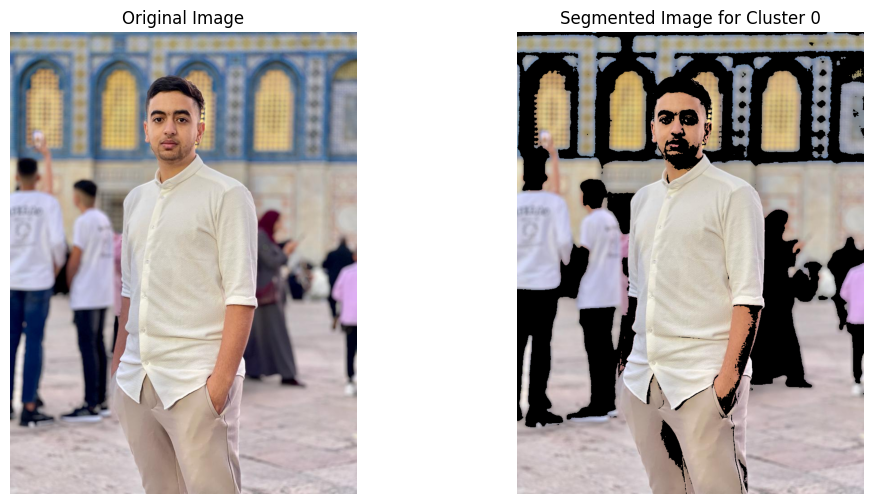

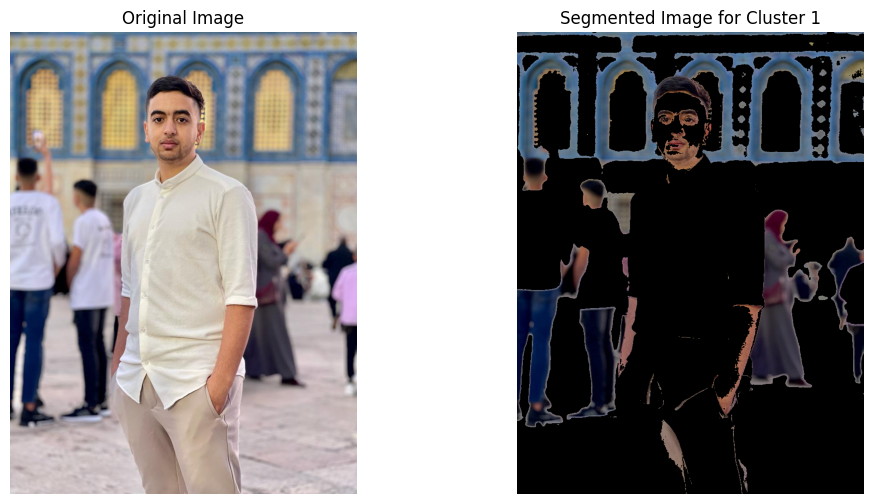

In [376]:
for cluster_label in set(predY):
    segmented_img = segment_image(pixel_values, predY, cluster_label)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(segmented_img)
    plt.title(f'Segmented Image for Cluster {cluster_label}')
    plt.axis('off')
    plt.show()



### For K = 5

In [377]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
model.fit(X)
# Predict cluster labels
predY = model.labels_

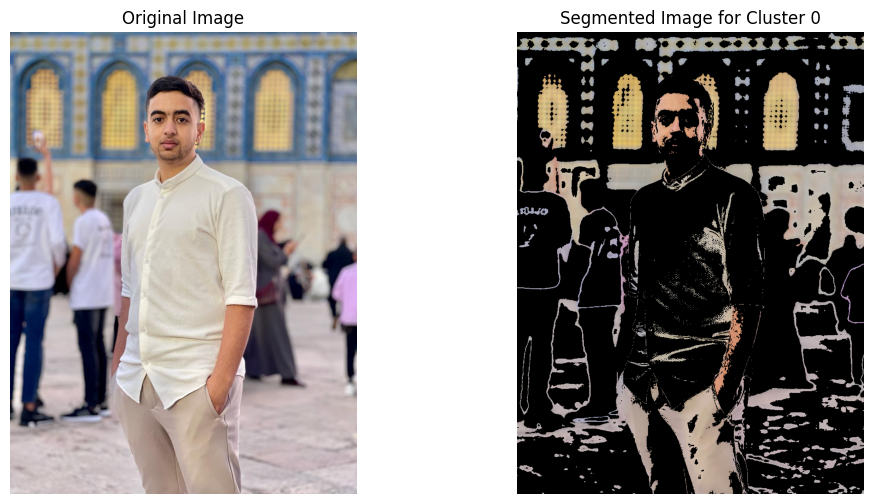

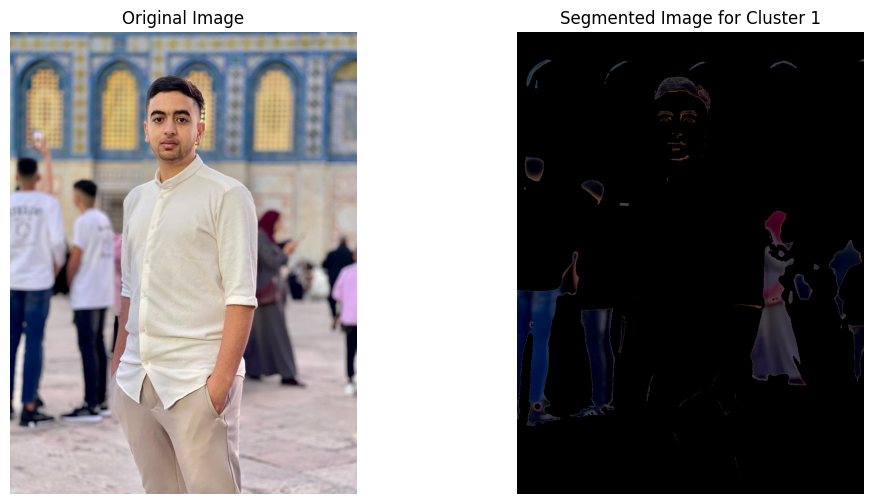

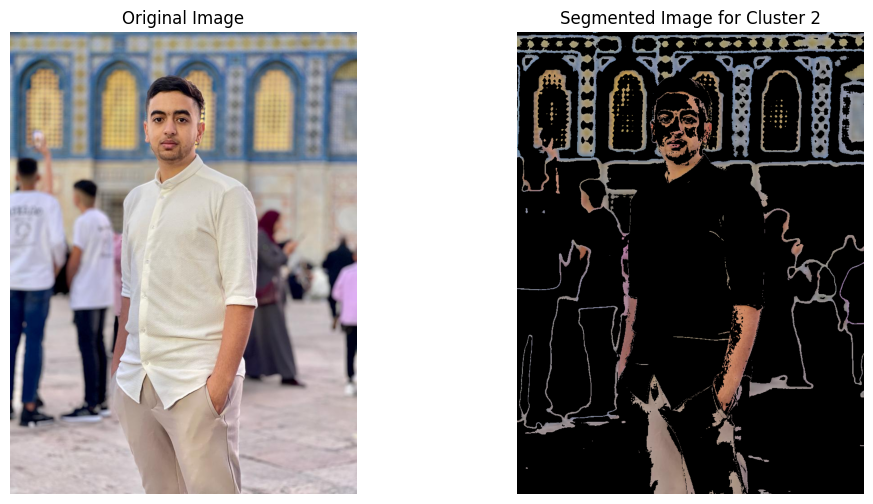

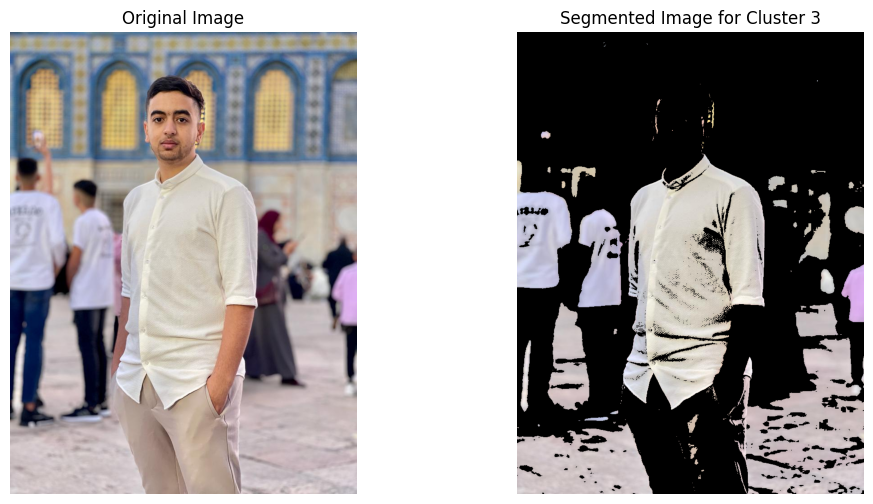

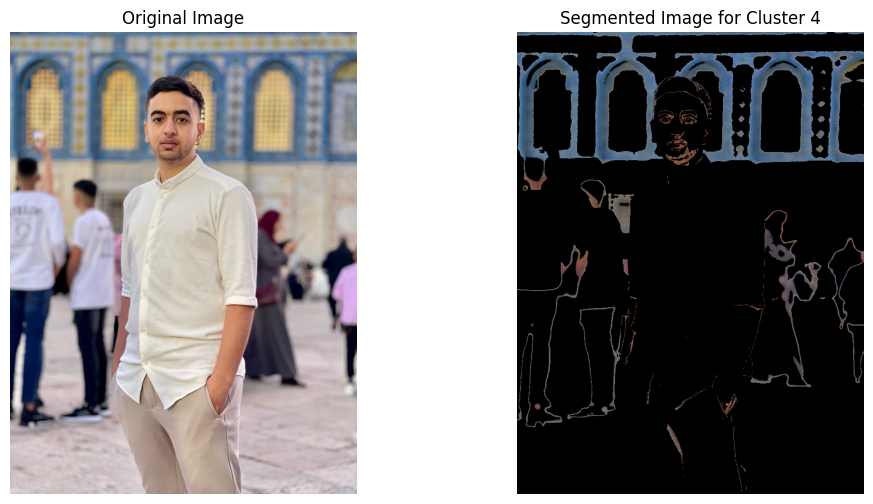

In [378]:
for cluster_label in set(predY):
    
    segmented_img = np.zeros_like(pixel_values)
    segmented_img = segment_image(pixel_values, predY, cluster_label)
    segmented_img = segmented_img.reshape(image.shape)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(segmented_img)
    plt.title(f'Segmented Image for Cluster {cluster_label}')
    plt.axis('off')
    plt.show()



### For K = 10

In [379]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model=KMeans(n_clusters=10)
model.fit(X)
# Predict cluster labels
predY = model.labels_

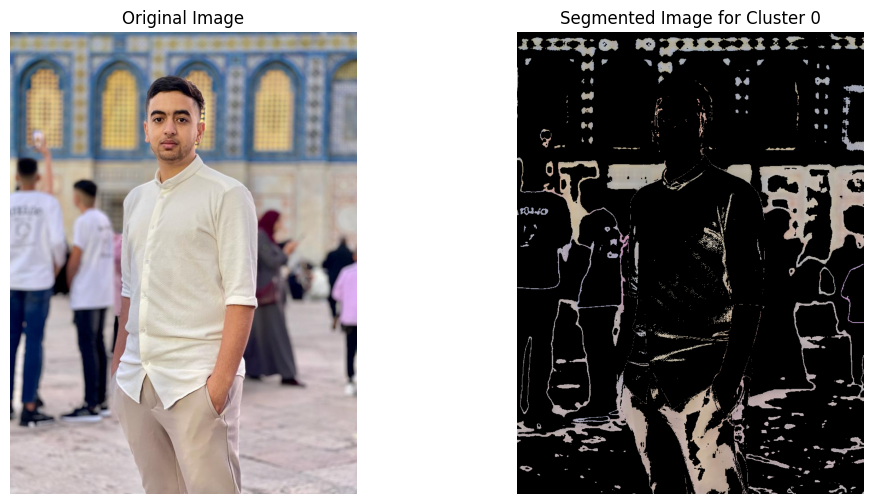

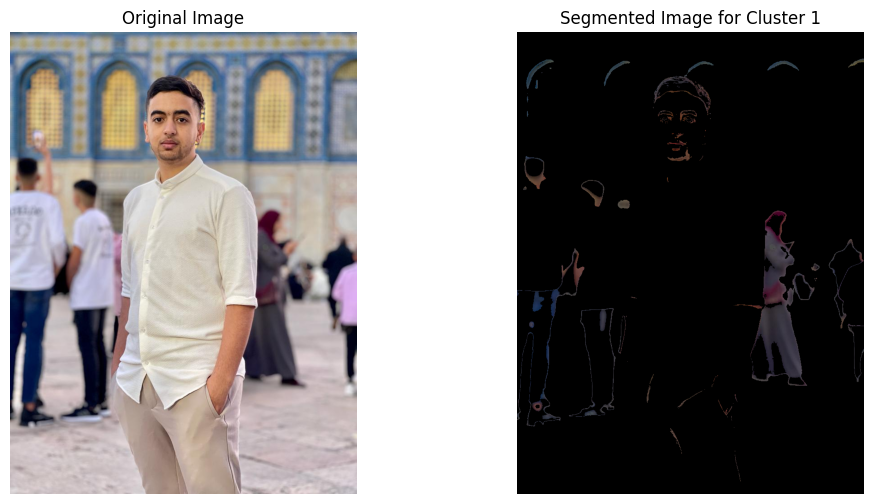

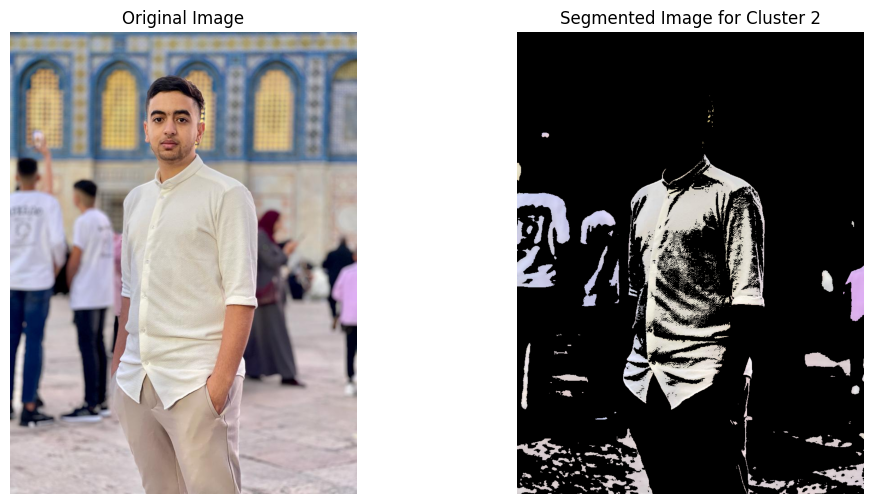

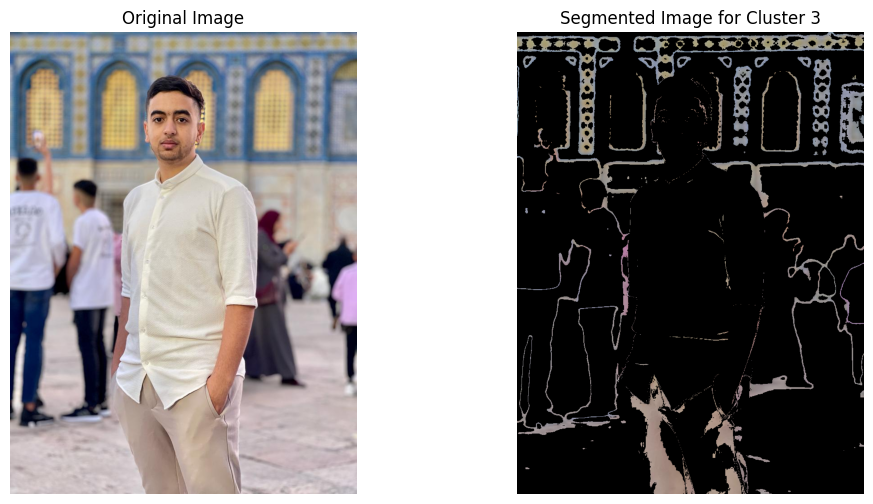

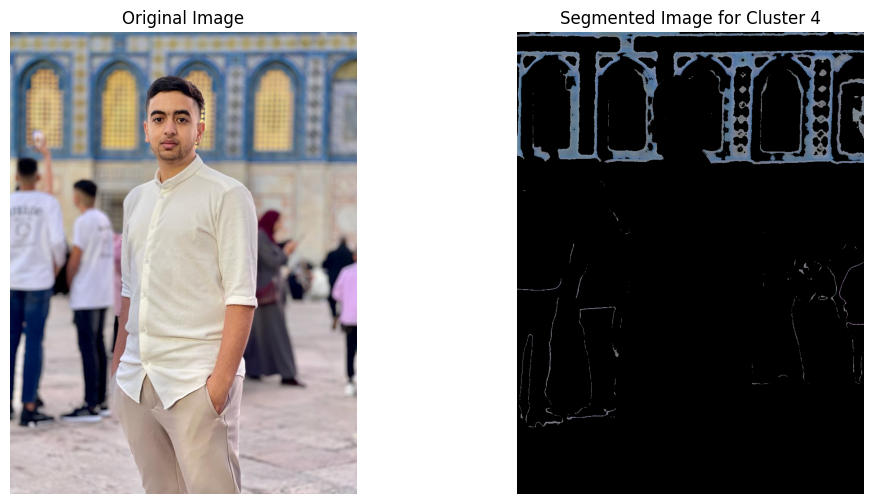

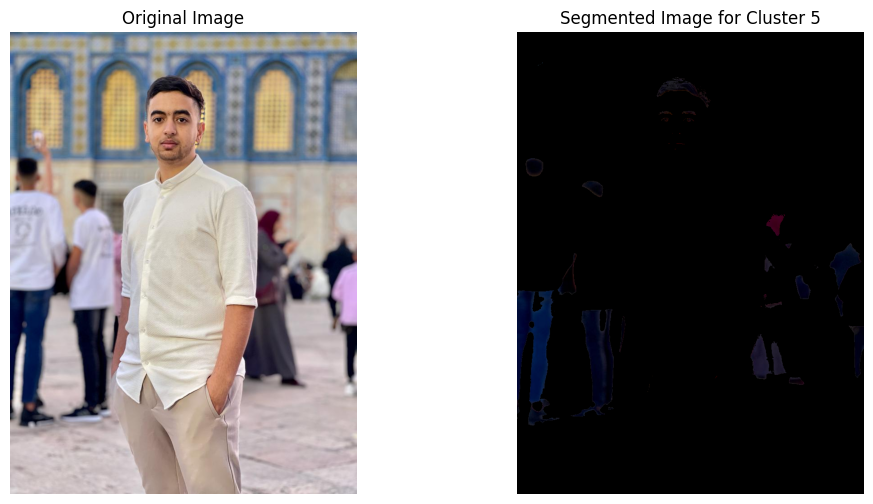

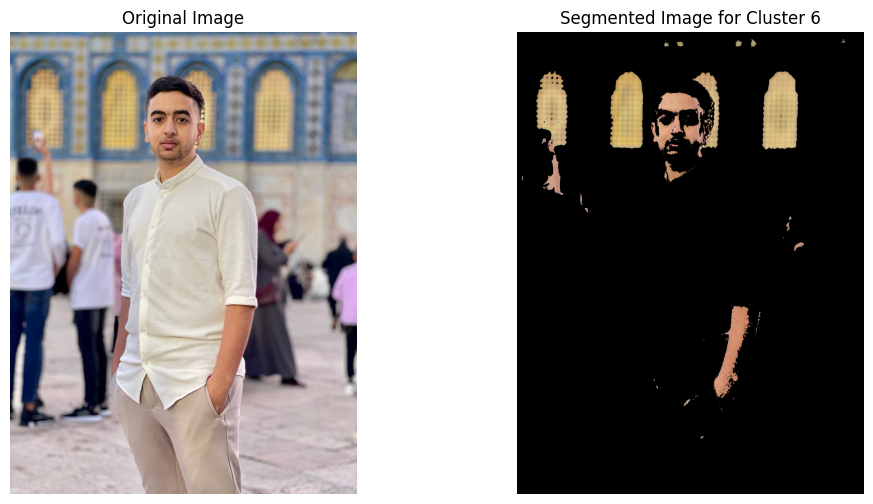

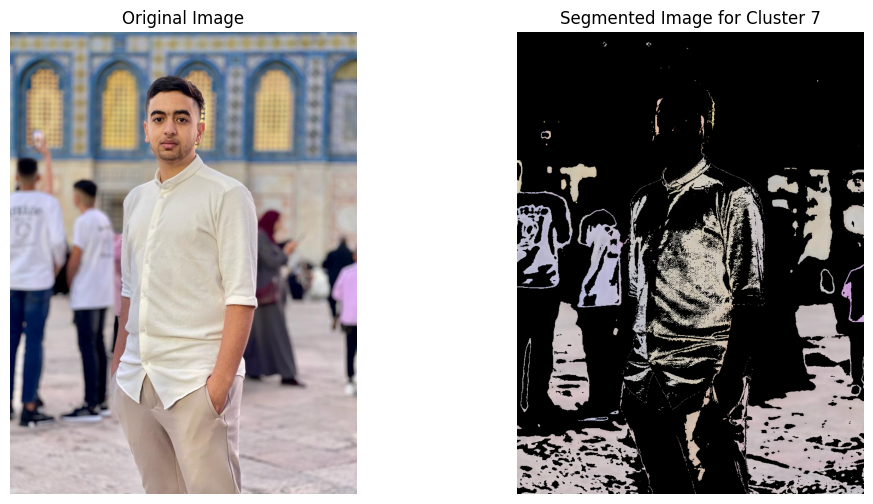

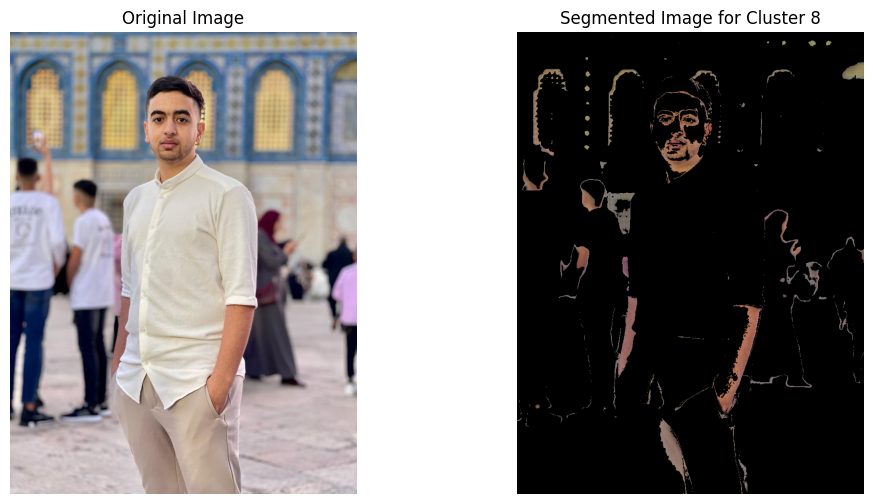

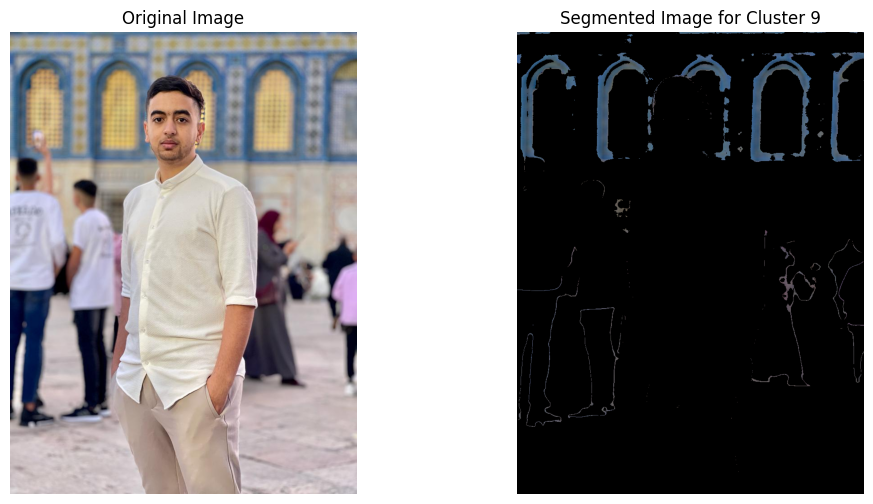

In [380]:
for cluster_label in set(predY):
    segmented_img = np.zeros_like(pixel_values)
    segmented_img = segment_image(pixel_values, predY, cluster_label)
    segmented_img = segmented_img.reshape(image.shape)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(segmented_img)
    plt.title(f'Segmented Image for Cluster {cluster_label}')
    plt.axis('off')
    plt.show()



### in the above code the image is clustered to the specified number of clusters and shows the cluster be making everything else in black